# Lab C
By Simon Van Norden and Nicolas Harvie
***

## Outline 
1. pandas_datareader
2. Unit Roots and Tests 
3. PCA 
4. Diebold and Li
***

## pandas_datareader
**`pandas_datareader`** is pre-installed on CoCalc

A great utility for accessing a growing list of free publicly-available datasets (covering finance, economics and other subjects) from your python program.

### Data Sources:
You can see the up-to-date list [here](https://pandas-datareader.readthedocs.io/en/latest/readers/index.html).<br>Some that may be of particular interest include
- [FRED](https://pandas-datareader.readthedocs.io/en/latest/readers/fred.html) The mother of all US economic data sources with some financial and international data as well. 
- [Ken French’s Data Library](https://pandas-datareader.readthedocs.io/en/latest/readers/famafrench.html): for Fama-French factors and various sorted portfolios for research.
- [The Bank of Canada](https://pandas-datareader.readthedocs.io/en/latest/readers/bank-of-canada.html)
- [Eurostat](https://pandas-datareader.readthedocs.io/en/latest/readers/eurostat.html)
- [OECD](https://pandas-datareader.readthedocs.io/en/latest/readers/oecd.html)
- [Yahoo Finance](https://pandas-datareader.readthedocs.io/en/latest/readers/yahoo.html)

### Syntax:
Each provider has a different database API with its own dedicated retrieval function. 
- Look up your data source [here](https://pandas-datareader.readthedocs.io/en/latest/readers/index.html) to see the syntax required.
- Helpful examples [here](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for most providers.

### Caching
Using a data cache with `pandas_datareader` has several advantages.

1. Reading the data from the remote server may take several seconds. Reading from the cache takes *milliseconds*.
1. Most of the data sources are provided free of charge, so abusing them by repeatedly requesting the same data may get you *blocked*(!)

Detailed instructions [here](https://pandas-datareader.readthedocs.io/en/latest/cache.html).<br>
The example below shows how easy it can be.

In [9]:
# First, the usual stuff
import numpy as np
import pandas as pd
import datetime 
import os
from pandas_datareader import data as pdr

### Simple Example

In [10]:
GE = pd.read_csv('../data/GE.csv', parse_dates=['Date'], index_col='Date')

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  70.132706  74.691650  70.132706  74.504295  73.455658  13998416
2020-01-03  72.256050  74.941452  72.006248  74.754097  73.701935  13752464
2020-01-06  73.942230  76.252930  73.942230  75.815765  74.748672  17925786
2020-01-07  75.878220  76.440285  74.441841  75.253708  74.194511  11301510
2020-01-08  74.878998  75.253708  74.129585  74.566742  73.517227   8871325


<AxesSubplot: xlabel='Date'>

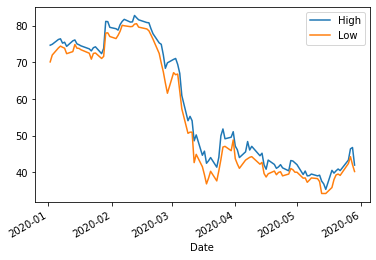

In [11]:
# the next two lines are only needed for Yahoo Finance
# from pandas_datareader.yahoo.headers import DEFAULT_HEADERS
# session.headers = DEFAULT_HEADERS

# yf.pdr_override()
# # Read some stock price info for GE
# startdate = datetime(2020,1,1)
# enddate = datetime(2020,5,15)
# GE = pdr.get_data_yahoo(['SCHAND.NS'], start=startdate, end=enddate)
# first few entries

# plot the closing prices
print(GE.head())
GE[['High','Low']].plot()


***
## ARCH Package 

[`ARCH`](https://arch.readthedocs.io/en/latest/index.html) is a package by [Kevin Sheppard](https://www.kevinsheppard.com/) of Oxford that's especially useful for ARCH modeling (more on that next week) and for Unit Root and Cointegration testing. While `statsmodels` has several unit root and cointegration tests, ARCH has more and does them better.

In your Problem Set 3, you will not use this, but I want to show you to give you quick tools 

### Tests for Unit Roots

Are your series $I(1)$ or $I(0)$? `ARCH` has several tests for you, including the ones that we talked about in class. You can find the exact syntax for all of them [here](https://arch.readthedocs.io/en/latest/api.html#unit-root-testing) but there are also nice examples for each test

- [Dickey-Fuller](https://arch.readthedocs.io/en/latest/unitroot/unitroot_examples.html#Augmented-Dickey-Fuller-Testing)
- [Phillips-Perron](https://arch.readthedocs.io/en/latest/unitroot/unitroot_examples.html#Phillips-Perron-Testing)
- [KPSS](https://arch.readthedocs.io/en/latest/unitroot/unitroot_examples.html#KPSS-Testing)

Let's see some quick examples using the Prices for GE shares that we downloaded above.

In [12]:
# import the tests
from arch.unitroot import ADF, PhillipsPerron, KPSS

# run them with defaults
adf_out = ADF(GE['High'])
PP_out = PhillipsPerron(GE['High'])
KPSS_out = KPSS(GE['High'])

# print the summaries
print(adf_out.summary())
print(PP_out.summary())
print(KPSS_out.summary())


   Augmented Dickey-Fuller Results   
Test Statistic                 -0.713
P-value                         0.843
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.50 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.856
P-value                         0.802
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.50 (1%), -2.89 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  1.364
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null 

### Tests for Cointegration

In [13]:
from arch.unitroot import engle_granger

eg_test = engle_granger(GE['High'], GE['Low'])
eg_test.summary()

Test Statistic,-2.650
P-value,0.218
ADF Lag length,2
Estimated Root ρ (γ+1),0.741


*** 
## Doing it Yourself 

In [14]:
from statsmodels.tsa.ar_model import AutoReg
import numpy.random as npr
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [15]:
Image(url="../slide_images/nonstationarity.png", width=700, height=500)

In [16]:
Image(url="../slide_images/ar1_revisited.png", width=700, height=500)

In [17]:
Image(url="../slide_images/recursive.png", width=700, height=400)

In [18]:
# Defining Required Inputs 
s = GE['High']
p = 3 

In [19]:
pd.DataFrame(data={
    'original_series': s,
    'diffed_series': s.diff(),
    'shifted_series': s.shift()
})

,original_series,diffed_series,shifted_series
Date,,,
2020-01-02,74.691650,NaN,NaN
2020-01-03,74.941452,0.249802,74.691650
2020-01-06,76.252930,1.311478,74.941452
2020-01-07,76.440285,0.187355,76.252930
2020-01-08,75.253708,-1.186577,76.440285
...,...,...,...
2020-05-22,40.468384,-0.437160,40.905544
2020-05-26,43.341141,2.872757,40.468384
2020-05-27,46.401249,3.060108,43.341141


In [20]:
# Running the regression 
res = AutoReg(endog=s.diff().dropna(), lags=p, exog=s.shift().dropna()).fit()

In [21]:
# A quick idea of what we have right now
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   High   No. Observations:                  102
Model:                   AutoReg-X(3)   Log Likelihood                -219.533
Method:               Conditional MLE   S.D. of innovations              2.222
Date:                Wed, 26 Jul 2023   AIC                            451.065
Time:                        11:13:19   BIC                            466.636
Sample:                             3   HQIC                           457.365
                                  102                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4096      0.820      0.500      0.617      -1.198       2.017
High.L1        0.0597      0.102      0.586      0.558      -0.140       0.260
High.L2       -0.0189      0.102     -0.185      0.853      -0.219       0.181
High.L3        0.0791      0.103      0.768      0.443      -0.123       0.281
High          -0.0125      0.014     -0.920      0.357      -0.039       0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2996           -0.0000j            2.2996           -0.0000
AR.2           -1.0306           -2.1054j            2.3441           -0.3225
AR.3           -1.0306           +2.1054j            2.3441            0.3225
-----------------------------------------------------------------------------
"""

In [22]:
Image(url="../slide_images/adf.png", width=700, height=500)

In [23]:
# A quick look of our params 
res.params

const      0.409623
High.L1    0.059729
High.L2   -0.018864
High.L3    0.079138
High      -0.012528
dtype: float64

In [24]:
# A quick look of our variance params 
res.cov_params()

,const,High.L1,High.L2,High.L3,High
const,0.672378,0.005326,0.006414,0.008511,-0.010718
High.L1,0.005326,0.010399,-0.000644,-0.000116,-0.000043
High.L2,0.006414,-0.000644,0.010404,-0.000608,-0.000066
High.L3,0.008511,-0.000116,-0.000608,0.010630,-0.000093
High,-0.010718,-0.000043,-0.000066,-0.000093,0.000185


I will let you find the appropriate inputs to the t_statistic based on those two outputs. 

In [25]:
# What about Trend stationarity ?
t = pd.Series(list(range(len(s))), s.index, name='time')
t

Date
2020-01-02      0
2020-01-03      1
2020-01-06      2
2020-01-07      3
2020-01-08      4
             ... 
2020-05-22     98
2020-05-26     99
2020-05-27    100
2020-05-28    101
2020-05-29    102
Name: time, Length: 103, dtype: int64

I will let you think about how can this be added to the prior regression as an exogenous variable to add a time-trend

And what about this weird $\delta$ statistic mentionned in the PS3? The last sentence of this footnote is your friend... 

In [26]:
Image(url="../slide_images/tau_stat.png", width=900, height=100)

### Martingale Simulation 

This will be very helpful in the context of Q1

In [27]:
Image(url="../slide_images/martingale.png", width=700, height=300)

In [28]:
# First difference of the series
delta_s = s.diff().dropna()

# Reproducing a Martingale
# We choose 100 as an arbitrary amount
# npr.seed(20221116)
delta_s.sample(100,replace=True,ignore_index=True).cumsum()

0     -1.061668
1     -1.186569
2     -2.685398
3     -2.060887
4     -3.247460
        ...    
95   -27.416068
96   -27.166266
97   -26.291949
98   -28.602645
99   -29.414512
Name: High, Length: 100, dtype: float64

The last part (D&E) concerns the rolling window ADF, which you should not be in such a bad shape if you understood rolling window in the past PS. Here is, however, a small tip that will be useful.

In [29]:
# Coding your dataframe
min_indexing_df = pd.DataFrame(index=s.index, data={'returns': s.pct_change()})
min_indexing_df.dropna(inplace=True)
min_indexing_df

,returns
Date,
2020-01-03,0.003344
2020-01-06,0.017500
2020-01-07,0.002457
2020-01-08,-0.015523
2020-01-09,0.003319
...,...
2020-05-22,-0.010687
2020-05-26,0.070988
2020-05-27,0.070605


In [30]:
# If you want to get the minimal value of this 
min_indexing_df.min()

returns   -0.112705
dtype: float64

In [31]:
# And the date at which it occured
min_indexing_df.idxmin()

returns   2020-03-09
dtype: datetime64[ns]

*** 
## PCA

In [32]:
import numpy.linalg as lin
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

<AxesSubplot: title={'center': 'CryptoCurrency Prices'}, xlabel='date', ylabel='Prices (in USD)'>

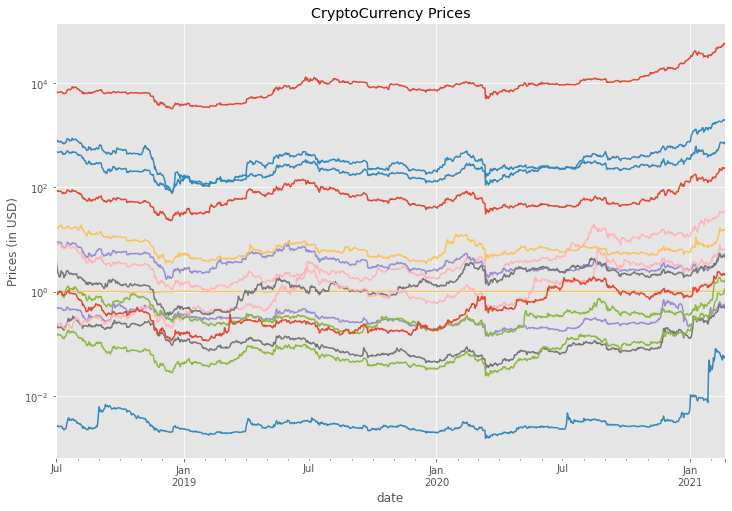

In [35]:
# Read the Cryptocurrency data
CCprices = pd.read_excel('../data/CryptoPrices.xlsx',index_col=0,parse_dates=True).dropna()
T, N = CCprices.shape
# Let's look at the data, just to check
CCprices.plot(legend=False,ylabel='Prices (in USD)',logy=True,title='CryptoCurrency Prices')

In [36]:
Image(url="../slide_images/latent_models.png", width=600, height=400)

In [37]:
# What does our data looks like?
CCprices

,btc,eth,xrp,xlm,usdt,ada,link,ltc,bch,eos,xtz,etc,zrx,omg,knc,doge
date,,,,,,,,,,,,,,,,
2018-06-30,6375.541231,451.723417,0.465710,0.192358,0.997349,0.136618,0.224832,80.756839,741.462834,8.103184,4.391950,16.109893,0.752089,7.559970,0.869299,0.002510
2018-07-01,6361.402539,451.798442,0.462217,0.198815,0.997453,0.143597,0.225820,79.894299,738.035825,8.133706,3.898995,16.066171,0.803292,7.987624,0.884189,0.002507
2018-07-02,6608.367157,475.989449,0.488880,0.214788,1.000819,0.154678,0.253382,85.442154,781.157152,8.929752,2.915169,16.680664,0.965046,8.385881,0.978576,0.002732
2018-07-03,6498.307859,461.751690,0.483516,0.204307,1.000134,0.149319,0.235176,84.816559,755.366187,8.795713,2.356642,16.116599,0.886731,7.903719,0.891158,0.002624
2018-07-04,6579.333376,465.729150,0.490573,0.209980,0.999383,0.151354,0.233187,85.331957,762.710076,8.886662,2.231109,16.808253,0.926266,8.099815,0.936051,0.002657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-17,52224.939114,1845.239942,0.538621,0.499004,1.000598,0.889657,32.206347,235.870927,717.119051,4.826758,4.586701,15.238509,1.560216,6.377462,2.120662,0.048835
2021-02-18,51650.069949,1932.411527,0.532702,0.496801,1.000250,0.910879,32.433531,226.584445,703.229505,4.833654,4.837343,14.901831,1.600010,6.529033,2.215768,0.060024
2021-02-19,55820.504404,1961.024290,0.566926,0.513582,1.000694,0.930084,34.782862,237.311040,721.830933,5.229159,4.968396,15.272755,1.554874,6.513614,2.188888,0.054844


In [38]:
Image(url="../slide_images/PCA1.png", width=600, height=400)

The idea is that we have several variables that are correlated/covary, hence we can avoid using them all and focus our analysis on what is called Principal Components. 

In [39]:
# Collection of Variables 
pd.DataFrame(CCprices.columns.T)

,0
0,btc
1,eth
2,xrp
3,xlm
4,usdt
5,ada
6,link
7,ltc
8,bch
9,eos


In [40]:
# I Will need my VCV 
vcv_cc = CCprices.cov()
vcv_cc

,btc,eth,xrp,xlm,usdt,ada,link,ltc,bch,eos,xtz,etc,zrx,omg,knc,doge
btc,6.475000e+07,2.308656e+06,177.553746,375.752945,9.893286,835.624273,44379.112906,212134.720094,386377.716618,-1133.592553,4328.666078,4608.923042,951.860592,4988.965568,2404.339855,51.592215
eth,2.308656e+06,9.071681e+04,10.274590,17.803031,0.298701,33.453195,1628.580719,7854.150155,20083.327285,22.330215,165.198708,314.520411,50.226686,274.365239,98.254692,2.081261
xrp,1.775537e+02,1.027459e+01,0.010628,0.006038,-0.000164,0.004565,0.068029,1.515763,8.347961,0.094923,-0.003238,0.154235,0.015723,0.096444,0.002568,0.000274
xlm,3.757529e+02,1.780303e+01,0.006038,0.006872,-0.000109,0.007442,0.208111,1.633672,8.959666,0.060582,0.020941,0.169860,0.019313,0.097867,0.015644,0.000467
usdt,9.893286e+00,2.987009e-01,-0.000164,-0.000109,0.000048,0.000079,0.008706,0.038004,-0.021111,-0.001151,0.001471,-0.000336,-0.000243,-0.000296,0.000572,0.000003
ada,8.356243e+02,3.345320e+01,0.004565,0.007442,0.000079,0.014237,0.584851,2.961551,8.030149,0.022111,0.062441,0.142390,0.022741,0.105458,0.038178,0.000920
link,4.437911e+04,1.628581e+03,0.068029,0.208111,0.008706,0.584851,38.749908,116.790649,112.999239,-2.593144,4.104461,0.713376,0.651619,3.963436,2.408025,0.034751
ltc,2.121347e+05,7.854150e+03,1.515763,1.633672,0.038004,2.961551,116.790649,1103.242753,2763.834431,20.935554,10.673576,40.529582,3.868986,22.954594,5.226802,0.178579
bch,3.863777e+05,2.008333e+04,8.347961,8.959666,-0.021111,8.030149,112.999239,2763.834431,22335.557822,181.624241,46.464076,434.377618,29.617576,176.591748,18.446587,0.405787
eos,-1.133593e+03,2.233022e+01,0.094923,0.060582,-0.001151,0.022111,-2.593144,20.935554,181.624241,2.306807,-0.048793,3.608405,0.199636,1.306598,-0.080205,0.000820


In [41]:
# I could also use the correlation matrix to avoid size distortion
# Here I will use this one because of the important disrepancies in size 
corr_cc = CCprices.corr()
corr_cc

,btc,eth,xrp,xlm,usdt,ada,link,ltc,bch,eos,xtz,etc,zrx,omg,knc,doge
btc,1.000000,0.952567,0.214030,0.563304,0.177469,0.870318,0.885979,0.793700,0.321287,-0.092754,0.585085,0.184694,0.446556,0.388998,0.618090,0.745403
eth,0.952567,1.000000,0.330892,0.713035,0.143151,0.930852,0.868620,0.785091,0.446163,0.048814,0.596551,0.336728,0.629525,0.571534,0.674815,0.803358
xrp,0.214030,0.330892,1.000000,0.706526,-0.229211,0.371136,0.106004,0.442651,0.541810,0.606218,-0.034164,0.482415,0.575737,0.586943,0.051521,0.309346
xlm,0.563304,0.713035,0.706526,1.000000,-0.189564,0.752356,0.403292,0.593321,0.723193,0.481167,0.274749,0.660734,0.879511,0.740721,0.390383,0.655221
usdt,0.177469,0.143151,-0.229211,-0.189564,1.000000,0.095890,0.201884,0.165155,-0.020390,-0.109396,0.230893,-0.015650,-0.132456,-0.026849,0.170864,0.049081
ada,0.870318,0.930852,0.371136,0.752356,0.095890,1.000000,0.787403,0.747258,0.450310,0.122010,0.569169,0.384805,0.719470,0.554525,0.661867,0.896022
link,0.885979,0.868620,0.106004,0.403292,0.201884,0.787403,1.000000,0.564855,0.121462,-0.274275,0.717143,0.036954,0.395167,0.399478,0.800205,0.649016
ltc,0.793700,0.785091,0.442651,0.593321,0.165155,0.747258,0.564855,1.000000,0.556773,0.414995,0.349510,0.393469,0.439728,0.433602,0.325519,0.625058
bch,0.321287,0.446163,0.541810,0.723193,-0.020390,0.450310,0.121462,0.556773,1.000000,0.800147,0.338146,0.937223,0.748124,0.741359,0.255325,0.315665
eos,-0.092754,0.048814,0.606218,0.481167,-0.109396,0.122010,-0.274275,0.414995,0.800147,1.000000,-0.034941,0.766097,0.496199,0.539751,-0.109237,0.062733


[Covariance vs Correlation](https://www.simplilearn.com/covariance-vs-correlation-article#:~:text=Covariance%20and%20correlation%20are%20two,the%20two%20variables%20are%20related)

In [42]:
# Using linalg to find the vectors and associated eigenvalues 
eval, evac = lin.eigh(corr_cc)

In [43]:
# What are... Eigenvectors?
# They are the weights associated with each Principal Components 
pd.DataFrame(evac, index=corr_cc.index)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
btc,0.697048,0.115033,0.082113,-0.285769,0.150192,0.187703,0.030952,0.079489,-0.207185,0.252117,-0.123274,0.172027,-0.148534,0.166974,0.262450,-0.278058
eth,-0.150180,-0.807487,0.004798,-0.000982,-0.312300,-0.042340,-0.051988,0.018322,-0.057057,0.252226,-0.039652,0.024570,-0.066907,0.128569,0.185402,-0.313998
xrp,-0.050922,-0.081096,0.053724,-0.102792,0.068854,0.080561,0.150404,0.136065,-0.334734,-0.451012,-0.489017,-0.396207,0.019704,0.302166,-0.294400,-0.187274
xlm,0.024628,0.305882,-0.122652,0.114106,-0.327012,-0.174415,-0.375038,-0.501839,-0.333380,0.161439,0.122462,-0.145750,0.127359,0.203106,-0.167227,-0.298379
usdt,0.025282,0.011216,-0.013631,0.016835,0.016153,0.010848,-0.072471,-0.069784,-0.099475,-0.028788,0.133190,-0.564839,-0.674281,-0.387703,0.188024,-0.020915
ada,-0.081865,0.037802,0.559940,0.064182,0.311159,-0.510272,0.273726,-0.171336,0.100287,-0.096098,0.215675,-0.021819,-0.015124,0.157882,0.144294,-0.316981
link,-0.024994,0.186765,-0.118585,0.778116,0.052691,0.063624,0.002536,0.253577,0.032264,0.065885,-0.278161,-0.039215,0.073481,0.003669,0.350832,-0.247076
ltc,-0.365663,0.186930,-0.411870,-0.200880,0.134553,-0.043316,0.049856,-0.176890,0.267569,-0.021946,-0.243281,0.326016,-0.460112,0.215409,0.024995,-0.267068
bch,-0.353167,0.092158,0.462518,0.060559,0.125573,0.480040,-0.159369,0.093529,-0.215336,0.194741,0.055320,0.247607,-0.138836,-0.200705,-0.314001,-0.249036
eos,0.455425,-0.176438,0.120676,0.298249,-0.141062,-0.028437,-0.183707,-0.119815,0.421641,-0.293772,-0.082473,0.178066,-0.241589,-0.083096,-0.451242,-0.132853


In [44]:
# What are... Eigenvalues?
# They correspond to the explained variance of each PC 
pd.Series(np.sort(eval)[::-1])

0     8.330397
1     3.386414
2     1.340415
3     1.078858
4     0.541047
5     0.505184
6     0.290698
7     0.199948
8     0.102221
9     0.059362
10    0.044239
11    0.039566
12    0.032449
13    0.023447
14    0.016358
15    0.009398
dtype: float64

In [45]:
# Percentage of explained variance 
explained_variance = np.sort(eval/sum(eval))[::-1]
pd.Series(explained_variance)

0     0.520650
1     0.211651
2     0.083776
3     0.067429
4     0.033815
5     0.031574
6     0.018169
7     0.012497
8     0.006389
9     0.003710
10    0.002765
11    0.002473
12    0.002028
13    0.001465
14    0.001022
15    0.000587
dtype: float64

In [46]:
Image(url="../slide_images/PCA2.png", width=600, height=400)

In [47]:
# First constraint
evac[0].T @ evac[0]

0.9999999999999998

In [48]:
# Second constraint 
evac[0].T @ evac[1]

2.0816681711721685e-16

In [49]:
# Finding my Principal Components
pc = pd.DataFrame(CCprices @ evac)

for i, name in enumerate(corr_cc.index):
    pc = pc.rename(columns={i: str(name)})

pc

,btc,eth,xrp,xlm,usdt,ada,link,ltc,bch,eos,xtz,etc,zrx,omg,knc,doge
date,,,,,,,,,,,,,,,,
2018-06-30,4089.588349,452.443648,831.557972,-1792.677597,915.969241,1524.170510,66.039936,574.450361,-1484.001436,1863.545556,-782.007299,1319.742484,-1118.259029,981.610184,1516.993103,-2129.214798
2018-07-01,4081.263256,450.355615,829.227324,-1788.690176,913.221671,1519.991307,66.242193,573.190584,-1480.235446,1859.711880,-780.287767,1315.887246,-1115.274419,979.911614,1514.158322,-2124.249061
2018-07-02,4232.961404,464.173431,867.213817,-1857.401431,948.715004,1585.930237,66.651882,596.218076,-1540.011135,1936.710445,-810.560972,1371.228259,-1162.334079,1016.896344,1569.199936,-2212.964554
2018-07-03,4167.638769,460.440389,846.608545,-1827.223352,933.454829,1553.866105,67.985228,584.620660,-1510.996948,1900.418576,-797.644637,1345.260338,-1141.317261,1002.295837,1545.959303,-2170.850524
2018-07-04,4220.839663,467.354420,856.273019,-1849.983894,945.235740,1572.296228,69.599504,591.841990,-1529.503198,1923.413432,-807.401536,1361.301719,-1154.888214,1014.762108,1565.335531,-2196.814285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-17,35789.087007,4634.379978,4524.027112,-14904.970548,7387.747810,10055.481487,1424.860291,4221.866390,-11016.418095,13768.488498,-6536.684999,9283.989066,-8086.078191,8855.263965,13833.499225,-15358.835344
2021-02-18,35383.540898,4494.904377,4474.721107,-14739.708458,7271.240877,9937.624520,1403.995276,4178.163071,-10901.631262,13642.961630,-6467.968837,9180.715831,-8000.191608,8771.196288,13703.153644,-15220.540222
2021-02-19,38275.891417,4955.642093,4821.162287,-15930.584182,7892.448963,10727.679479,1529.274843,4510.664624,-11768.383882,14705.000501,-6985.431517,9907.029882,-8629.017985,9469.639246,14797.961111,-16397.382762


Let's review some characteristics !

In [50]:
Image(url="../slide_images/PCA3.png", width=600, height=400)

In [51]:
# First property
# Need to use the covariance matrix in that case
eval_cov, evac_cov = lin.eigh(CCprices.cov())
pc_cov = CCprices @ evac_cov

In [52]:
# DataFrame for Comparison
pd.DataFrame(data={
    'eigenvalues': eval_cov,
    'var(PC)': pc_cov.var()
})

,eigenvalues,var(PC)
0,8.063213e-06,8.063213e-06
1,3.282856e-05,3.282856e-05
2,4.532360e-04,4.532360e-04
3,6.794042e-04,6.794042e-04
4,3.939058e-03,3.939058e-03
5,1.027346e-02,1.027346e-02
6,2.704962e-02,2.704962e-02
7,1.066939e-01,1.066939e-01
8,1.906553e-01,1.906553e-01
9,5.842516e-01,5.842516e-01


In [53]:
# Second property
pc_cov.iloc[:, 0:2].cov()

,0,1
0,8.063213e-06,-3.450458e-16
1,-3.450458e-16,3.282856e-05


Why is this useful?

In [54]:
Image(url="../slide_images/factors.png", width=600, height=400)

### Building a Scree Plot

Text(0.5, 1.0, 'Explained variance vs Number of factors')

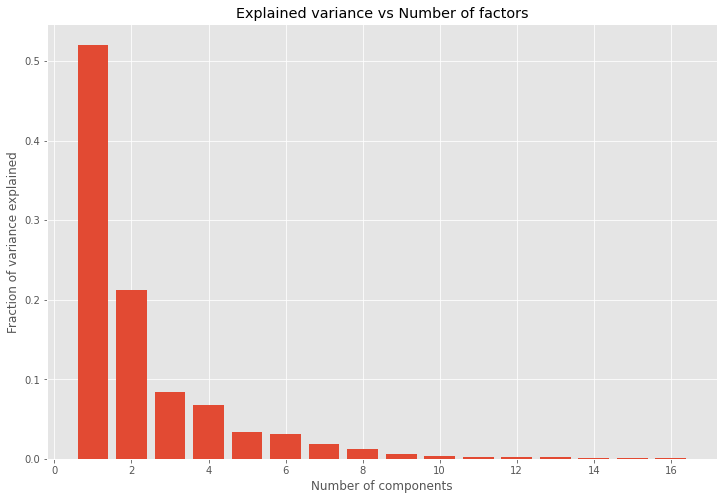

In [55]:
plt.bar(np.arange(1,N+1), explained_variance )
plt.xlabel("Number of components")
plt.ylabel("Fraction of variance explained")
plt.title("Explained variance vs Number of factors")

But why does this work? Does this seem like magic to you? It does to me and still intrigues me quite a bit... You could verify this makes sense with the properties of matrices through something called ... **The Spectral Decomposition Theorem**

In [56]:
# But that's a bit too spooky for us! ;)
Image(url="../slide_images/ghost.jpeg", width=600, height=400)

You will only be required to understand the intuition behind PCA and know how to apply it.

***
## Diebold and Li

In [57]:
# Finding the loadings 
Image(url="../slide_images/DL1.png", width=600, height=400)

In [58]:
# Estimating the coefficients  
Image(url="../slide_images/DL2.png", width=600, height=400)